In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams as rc

rc['figure.figsize'] = 20, 10
rc['axes.titlesize'] = 18
rc['axes.labelsize'] = 14
rc['xtick.labelsize'] = 14
rc['ytick.labelsize'] = 14
rc['legend.fontsize'] = 12
rc['figure.facecolor'] = '#00000000'

sns.color_palette("rocket", as_cmap=True)
sns.set_style('darkgrid')

# Looking at data and potential cleaning

In [2]:
ab = pd.read_csv('AB_NYC_2019.csv')
ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# check for nan
ab.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
ab.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# get all rows with nan values with the exception of nan values in last_review and reviews_per_month
# https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
ab[ab.loc[:, ~ab.columns.isin(['last_review', 'reviews_per_month'])].isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0


# EDA

<AxesSubplot:xlabel='price', ylabel='Count'>

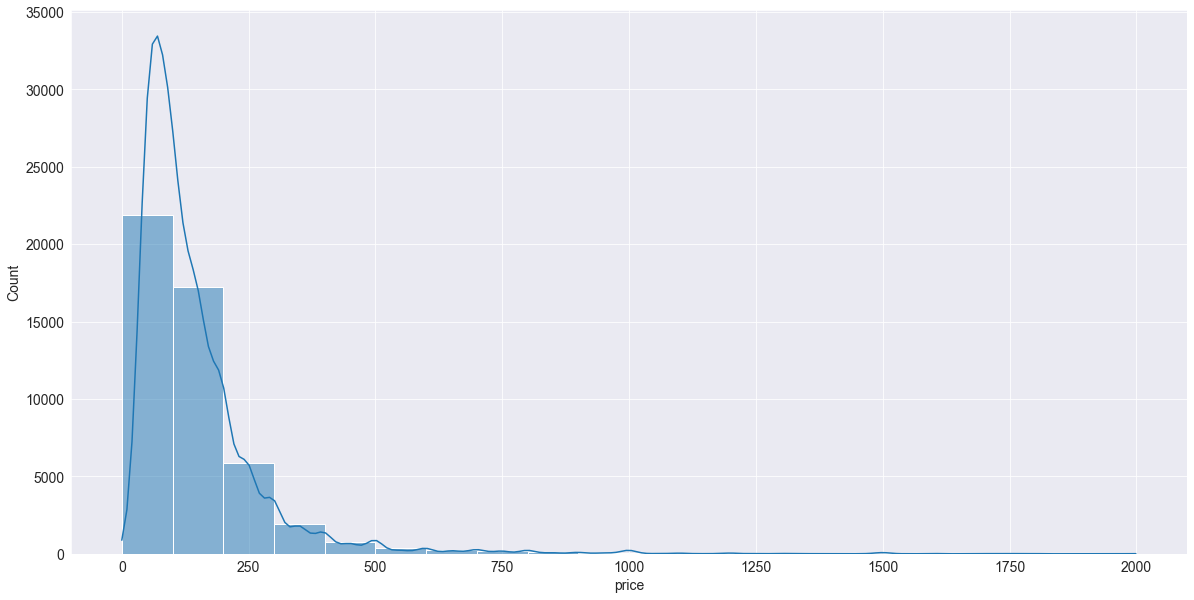

In [6]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# histogram plot for price less than 2000
sns.histplot(data=ab[ab['price'] < 2000]['price'], binwidth=100, kde=True)

### => Prices are skewed but fall in between the range of 250$ per night

<AxesSubplot:xlabel='room_type', ylabel='Count'>

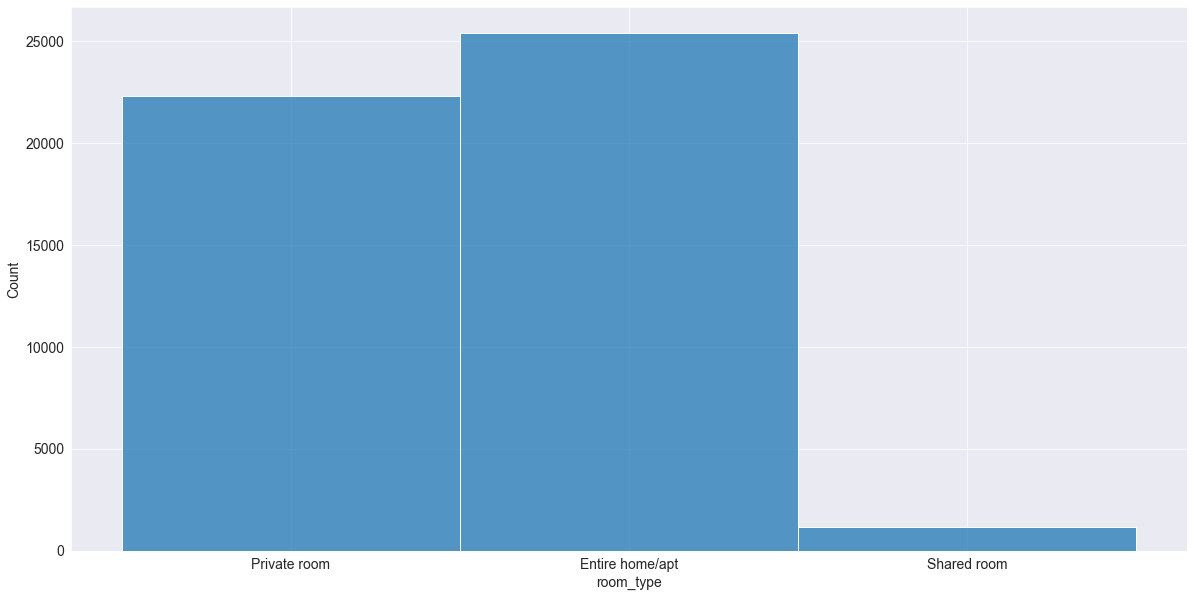

In [7]:
sns.histplot(ab['room_type'])

<AxesSubplot:xlabel='id', ylabel='price'>

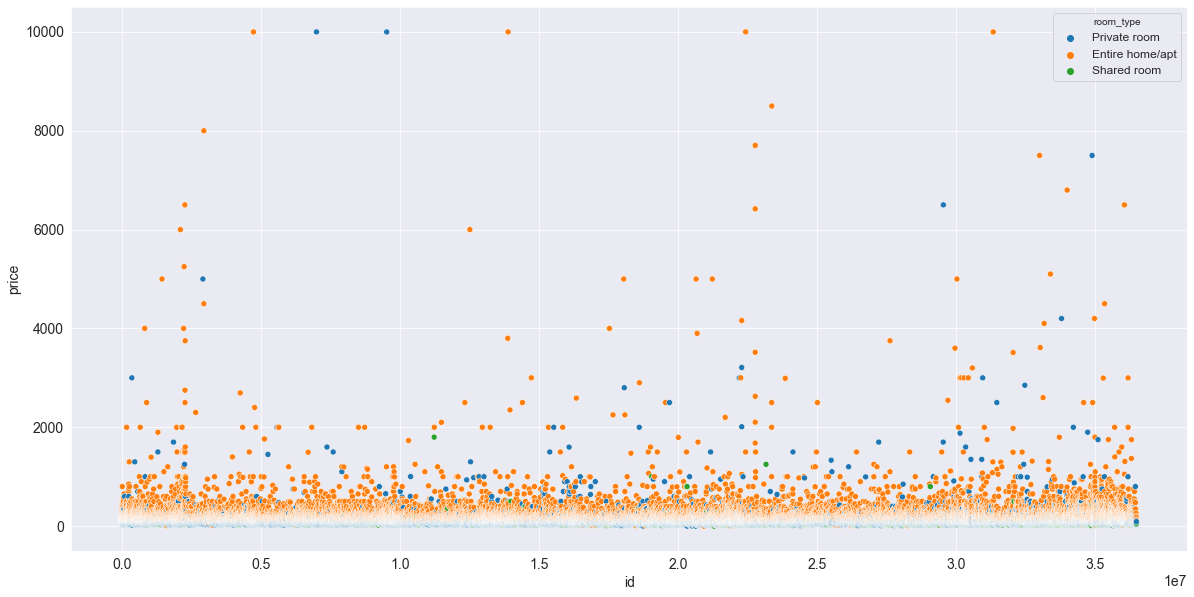

In [8]:
sns.scatterplot(data=ab, x='id',y='price', hue='room_type')

In [9]:
avg_ent = ab[ab['room_type']=='Entire home/apt']['price'].mean()
avg_pri = ab[ab['room_type']=='Private room']['price'].mean()
print(f"Average price for entire home and private room: {avg_ent=} | {avg_pri=}")

Average price for entire home and private room: avg_ent=211.79424613325986 | avg_pri=89.78097285675894


### => Private room is most likely the cheaper option

## Where should I stay?

In [10]:
ab['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='Count'>

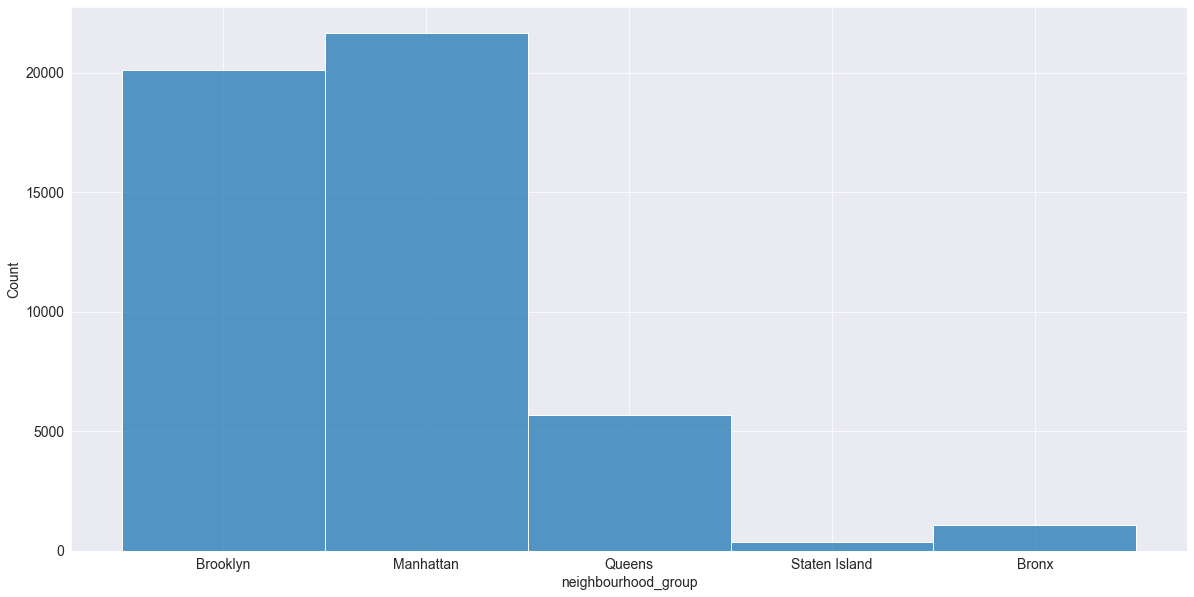

In [11]:
sns.histplot(data=ab, x='neighbourhood_group')

In [12]:
manhat = ab[ab['neighbourhood_group'] == 'Manhattan']
manhat.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


<AxesSubplot:xlabel='id', ylabel='price'>

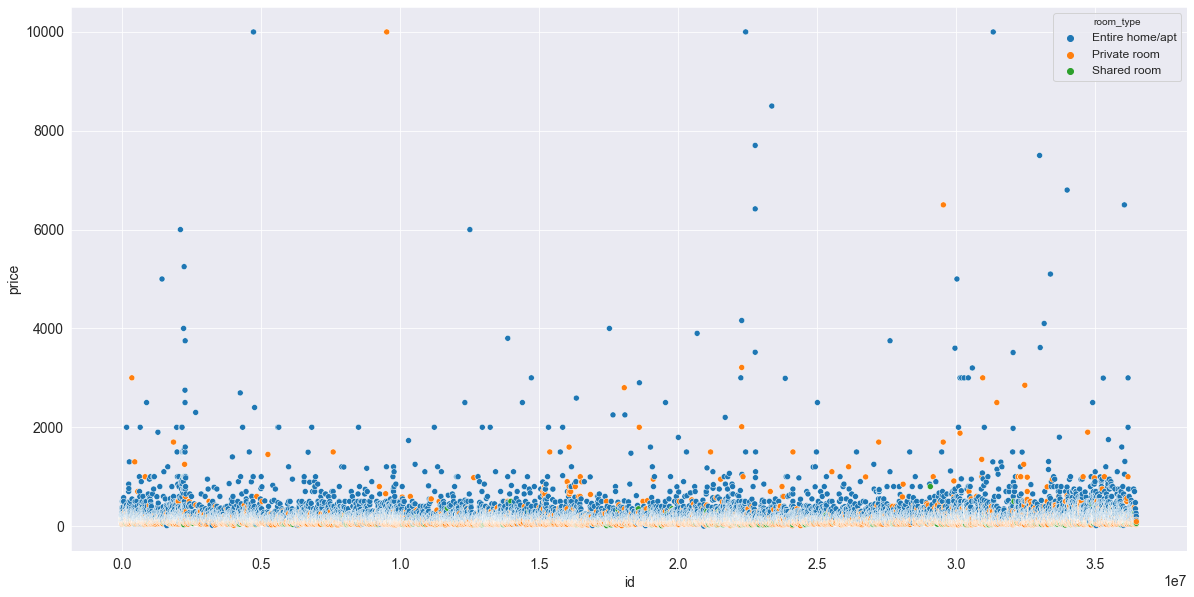

In [13]:
sns.scatterplot(data=manhat, x='id', y='price', hue='room_type')

In [14]:
manhat.groupby(by=["room_type"])['price'].mean()

room_type
Entire home/apt    249.239109
Private room       116.776622
Shared room         88.977083
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

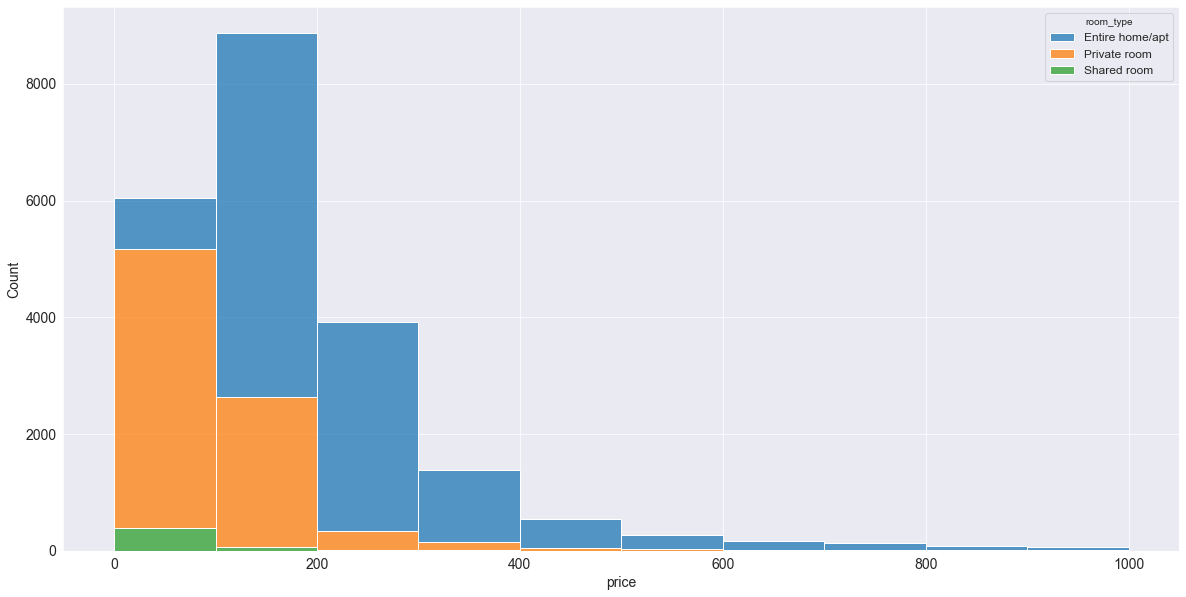

In [15]:
sns.histplot(data=manhat[manhat['price'] < 1000], x='price', hue='room_type', binwidth=100, multiple='stack')

In [ ]:
sns.histplot(data=ab, x='neighbourhood_group', hue='room_type', multiple='stack')

In [ ]:
sns.scatterplot(data=ab, x='longitude', y='latitude', hue='neighbourhood_group', size='price')

In [ ]:
sns.scatterplot(data=ab[(ab['neighbourhood_group'] == 'Manhattan') & (ab['price'] <= 500)], x='longitude', y='latitude', hue='room_type', size='price')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

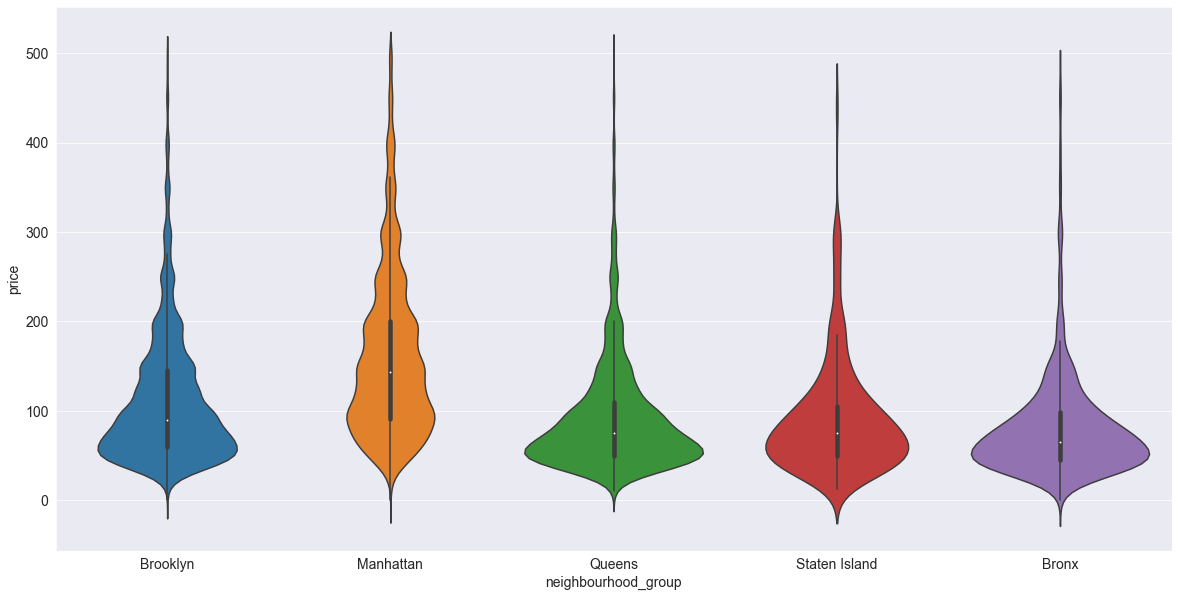

In [19]:
sns.violinplot(data=ab[ab['price'] < 500], x='neighbourhood_group', y='price')

## Not sure if i can come up with more viz at this point so i'm gonna move on to modeling

---

# Predictive modeling

In [30]:
ab['neighbourhood_group']= ab['neighbourhood_group'].astype("category").cat.codes
ab['neighbourhood'] = ab['neighbourhood'].astype("category").cat.codes
ab['room_type'] = ab['room_type'].astype("category").cat.codes

c:\users\trung\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

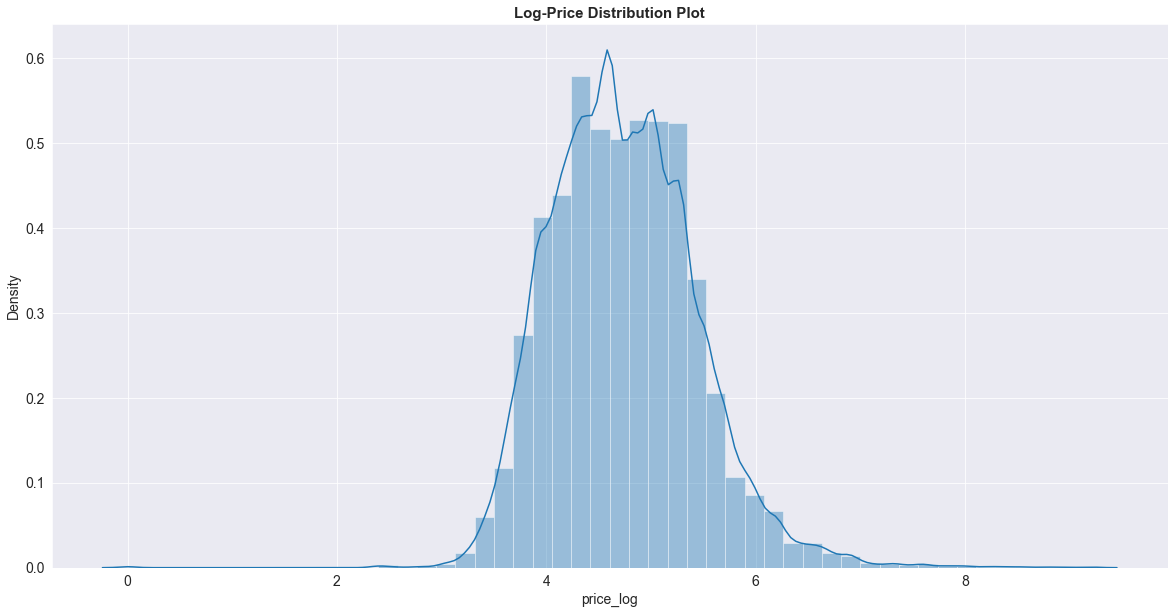

In [31]:
ab['price_log'] = np.log(ab.price+1)
sns.distplot(ab['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [32]:
nyc_model = ab.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])
nyc_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [33]:
mean = nyc_model['reviews_per_month'].mean()
nyc_model['reviews_per_month'].fillna(mean, inplace=True)
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

In [34]:
nyc_model.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365,5.010635
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355,5.420535
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365,5.017280
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194,4.499810
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0,4.394449


In [35]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [37]:
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

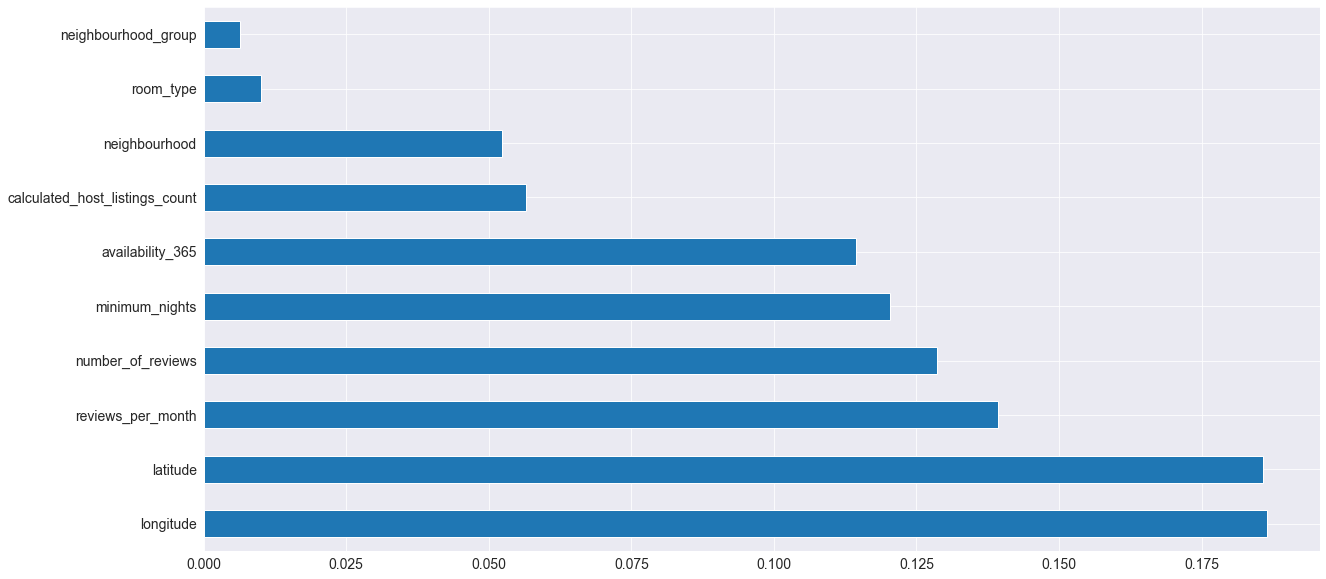

In [40]:
lab_enc = LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

feat_importances = pd.Series(feature_model.feature_importances_, index=nyc_model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [49]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)

linear_reg(nyc_model_x, nyc_model_y)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
-0.264341335085895


In [51]:
def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)

ridge_reg(nyc_model_x, nyc_model_y)

{'alpha': 0.01, 'normalize': True}
-0.2643274608584906


In [52]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

lasso_reg(nyc_model_x, nyc_model_y)

{'alpha': 0.001, 'normalize': False}
-0.2641827976211087


In [53]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

elastic_reg(nyc_model_x, nyc_model_y)

{'alpha': 0.01, 'normalize': False}
-0.2641707599476723


In [47]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kfold_cv.split(nyc_model_x,nyc_model_y):
    X_train, X_test = nyc_model_x[train_index], nyc_model_x[test_index]
    y_train, y_test = nyc_model_y[train_index], nyc_model_y[test_index]

In [48]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

In [54]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

___

In [60]:
nyc_model_xx= nyc_model.drop(columns=['neighbourhood_group', 'room_type'])
nyc_model_xx, nyc_model_yx = nyc_model_xx.iloc[:,:-1], nyc_model_xx.iloc[:,-1]
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(nyc_model_xx, nyc_model_yx, test_size=0.3,random_state=42)
scaler = StandardScaler()
nyc_model_xx = scaler.fit_transform(nyc_model_xx)

In [61]:
### Linear Regression ###
linear_reg(nyc_model_xx, nyc_model_yx, cv=4)
ridge_reg(nyc_model_xx, nyc_model_yx, cv=4)
lasso_reg(nyc_model_xx, nyc_model_yx, cv=4)
elastic_reg(nyc_model_xx, nyc_model_yx, cv=4)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}
-0.4170547973917398
{'alpha': 0.01, 'normalize': True}
-0.41701941848995905
{'alpha': 0.001, 'normalize': False}
-0.41686452493741294
{'alpha': 0.01, 'normalize': False}
-0.4167831789208253


In [62]:
kfold_cv=KFold(n_splits=4, random_state=42, shuffle=True)
for train_index, test_index in kfold_cv.split(nyc_model_xx,nyc_model_yx):
    X_train_x, X_test_x = nyc_model_xx[train_index], nyc_model_xx[test_index]
    y_train_x, y_test_x = nyc_model_yx[train_index], nyc_model_yx[test_index]

In [63]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_x = Poly.fit_transform(X_train_x)
X_test_x = Poly.fit_transform(X_test_x)

In [65]:
###Linear Regression
lr_x = LinearRegression(copy_X= True, fit_intercept = True, normalize = False)
lr_x.fit(X_train_x, y_train_x)
lr_pred_x= lr_x.predict(X_test_x)

###Ridge
ridge_x = Ridge(alpha = 0.01, normalize = True)
ridge_x.fit(X_train_x, y_train_x)           
pred_ridge_x = ridge_x.predict(X_test_x) 

###Lasso
Lasso_x = Lasso(alpha = 0.001, normalize =False)
Lasso_x.fit(X_train_x, y_train_x)
pred_Lasso_x = Lasso_x.predict(X_test_x) 

##ElasticNet
model_enet_x = ElasticNet(alpha = 0.01, normalize=False)
model_enet_x.fit(X_train_x, y_train_x) 
pred_train_enet_x= model_enet_x.predict(X_train_x)
pred_test_enet_x= model_enet_x.predict(X_test_x)

# print('-------------Lineer Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, lr_pred_x)))   
print('R2 %f' % r2_score(y_test_x, lr_pred_x))

print('---------------Ridge ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_ridge_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_ridge_x)))   
print('R2 %f' % r2_score(y_test_x, pred_ridge_x))

print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x, pred_Lasso_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x, pred_Lasso_x)))
print('R2 %f' % r2_score(y_test_x, pred_Lasso_x))

print('---------------ElasticNet-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x,pred_test_enet_x)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x,pred_test_enet_x))) #RMSE
print('R2 %f' % r2_score(y_test_x, pred_test_enet_x))

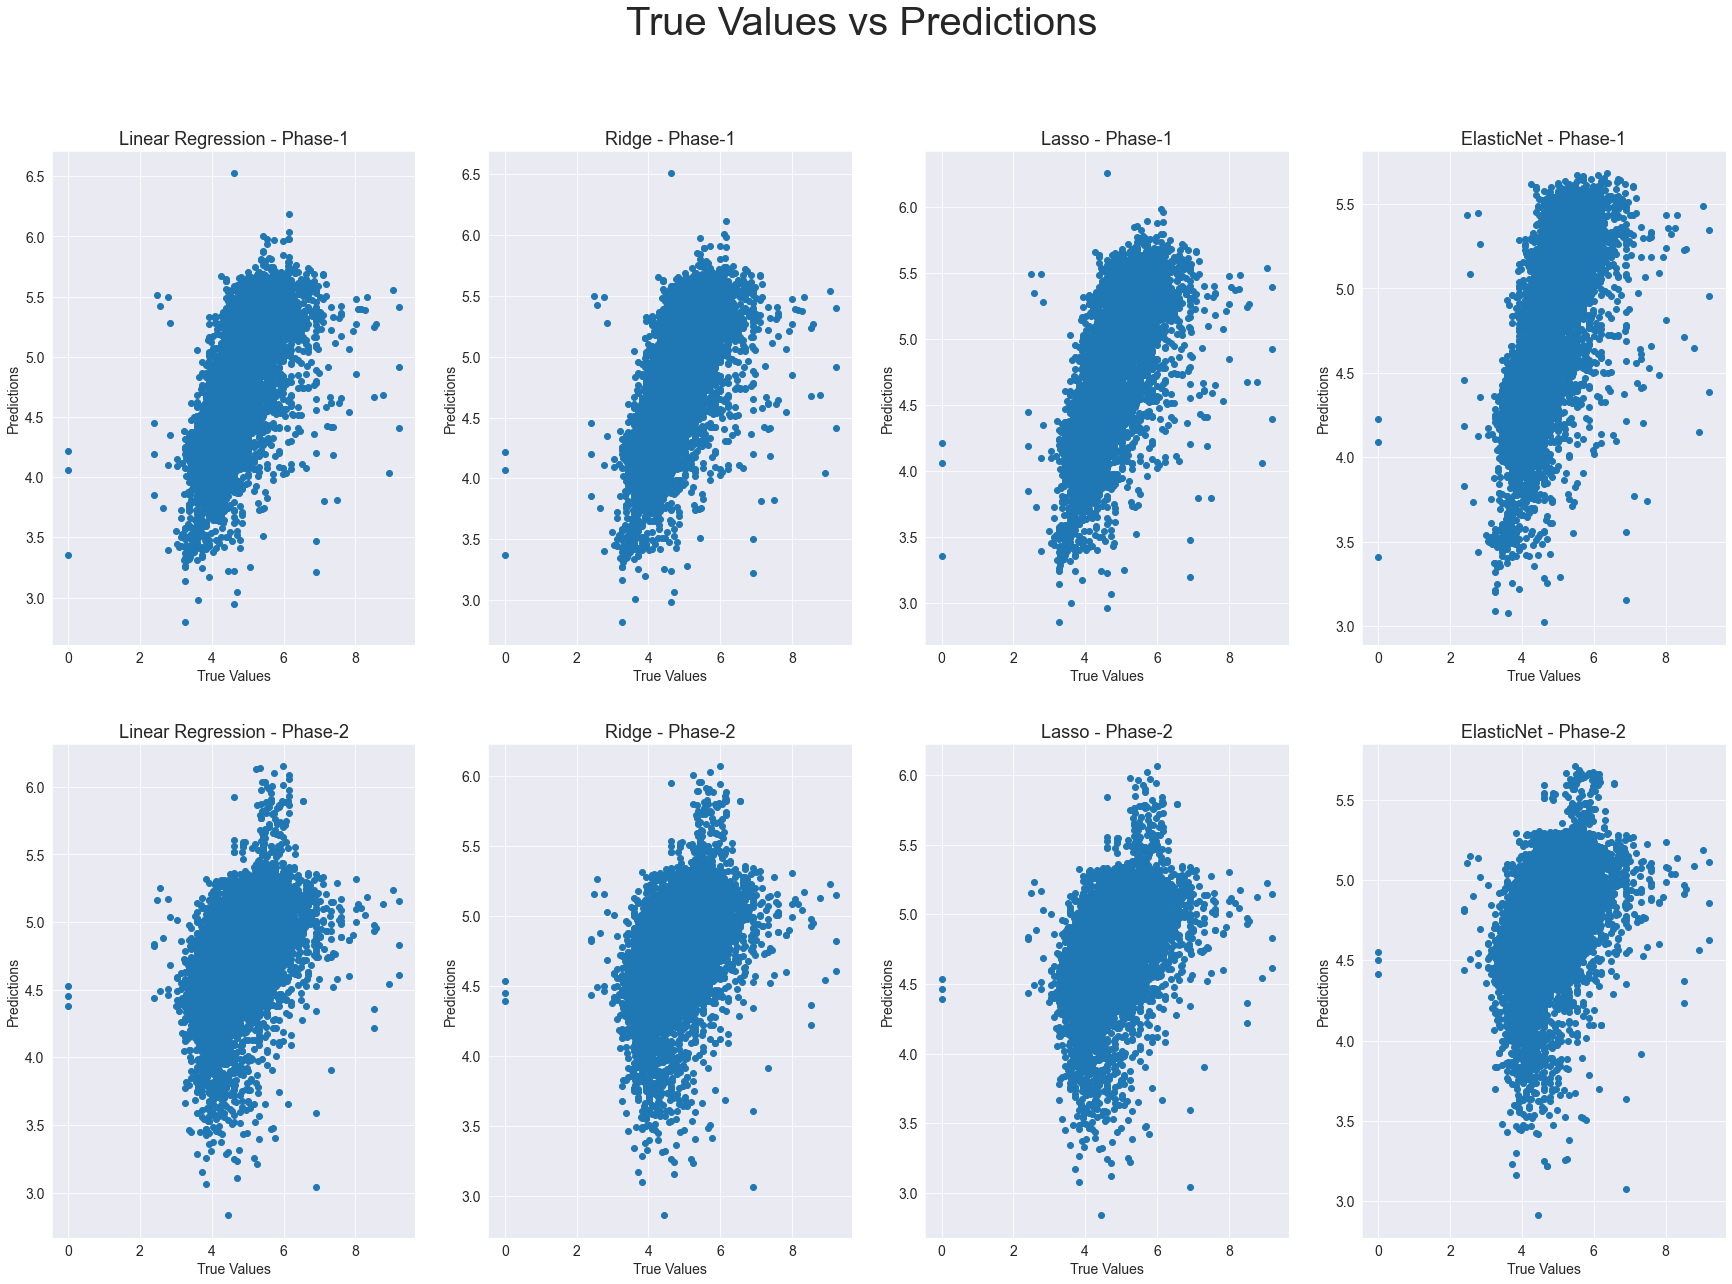

In [70]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(30, 20))
fig.suptitle('True Values vs Predictions', size=40)

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression - Phase-1')

ax2.scatter(y_test, pred_ridge)
ax2.set_title('Ridge - Phase-1')

ax3.scatter(y_test, pred_Lasso)
ax3.set_title('Lasso - Phase-1')

ax4.scatter(y_test, pred_test_enet)
ax4.set_title('ElasticNet - Phase-1')

ax5.scatter(y_test_x, lr_pred_x)
ax5.set_title('Linear Regression - Phase-2')

ax6.scatter(y_test_x, pred_ridge_x)
ax6.set_title('Ridge - Phase-2')

ax7.scatter(y_test_x, pred_Lasso_x)
ax7.set_title('Lasso - Phase-2')

ax8.scatter(y_test_x, pred_test_enet_x)
ax8.set_title('ElasticNet - Phase-2')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

## Reading
- Lasso reg:  basically just linear train with L1 regularizer, `Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 (no L2 penalty).` [Readme](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- Ridge reg: Linear least squares with l2 regularization. [Reame](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge)
- Elastic reg: Linear regression with combined L1 and L2 priors as regularizer [Readme](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elastic#sklearn.linear_model.ElasticNet)